# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [3]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [4]:
def MSE(y_true, y_pred):
    return np.mean(pow(y_true - y_pred, 2))

#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [5]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(pow(y_true - y_pred, 2)))

# or
def RMSE2(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [6]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [7]:
def R2(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2)
    return (SST - SSE) / SST

### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [8]:
df = pd.read_csv('advertising.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
X = df.drop(columns='Sales')
y = df['Sales']

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

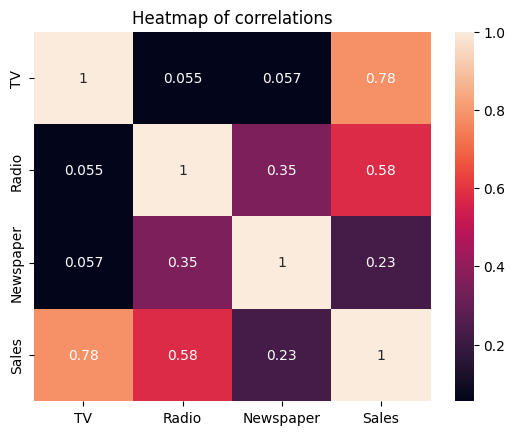

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlations')
plt.show()

# TV advertisements work best, while newspaper ads are ignored

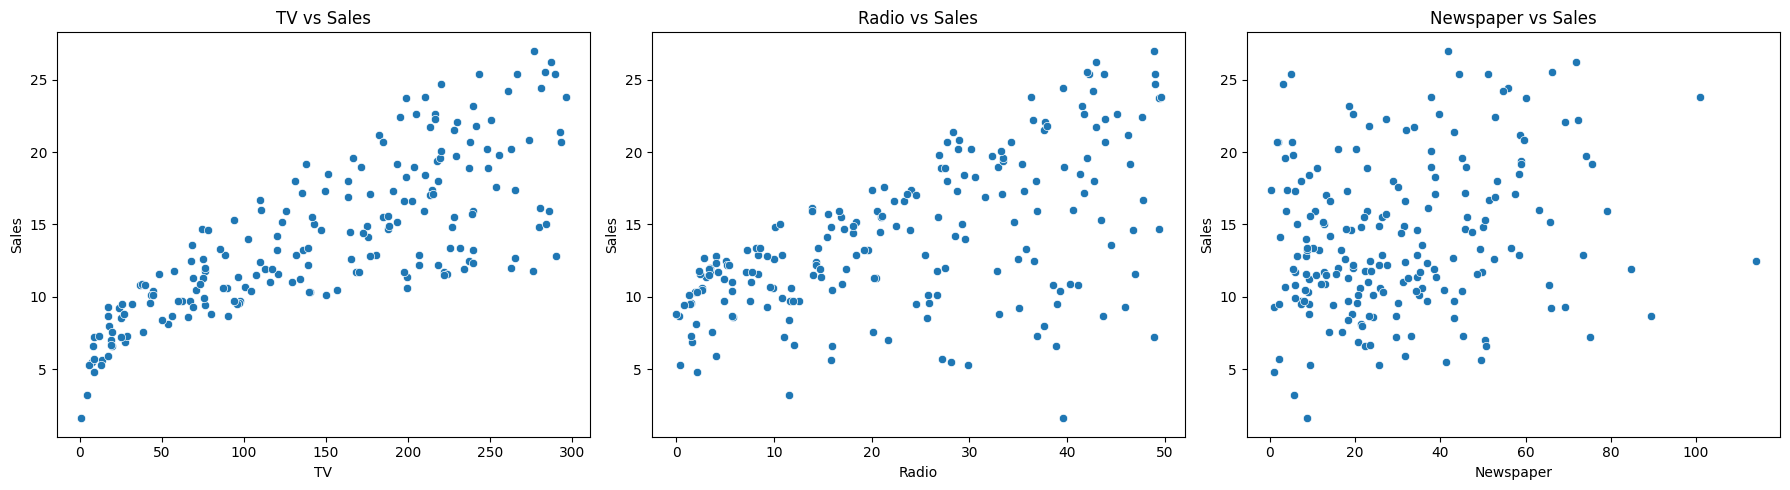

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x=df["TV"], y=df["Sales"], ax=axes[0])
axes[0].set_title("TV vs Sales")

sns.scatterplot(x=df["Radio"], y=df["Sales"], ax=axes[1])
axes[1].set_title("Radio vs Sales")

sns.scatterplot(x=df["Newspaper"], y=df["Sales"], ax=axes[2])
axes[2].set_title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

# Newspaper driven sales are not related to budget size, where TV and Radio are related

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
print("b0: ", model.intercept_)
print("b1: ", model.coef_)

b0:  3.1010479746404727
b1:  [ 0.04508445  0.19190334 -0.00347319]


#### 2.5 Evaluate created model with above functions

In [15]:
print("MAE: ", MAE(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))
print("RMSE: ", RMSE(y_test, y_pred))
print("MAPE: ", MAPE(y_test, y_pred))
print("R2: ", R2(y_test, y_pred))

MAE:  1.2414902596508472
MSE:  3.472629968752789
RMSE:  1.863499387913178
MAPE:  18.638804594568978
R2:  0.8515370160992793


#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [16]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=kf,
    scoring='r2'
)
print("Mean accuracy:", cv_scores.mean())

Mean accuracy: 0.8731388460886025


#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [17]:
drop_data = df.drop(columns='Newspaper')
X_reduced = drop_data.drop(columns='Sales')
y = df['Sales']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.33, random_state=17)

model_reduced = LinearRegression()
model_reduced.fit(Xr_train, yr_train)

yr_pred = model_reduced.predict(Xr_test)

In [18]:
print("MAE: ", MAE(yr_test, yr_pred))
print("MSE: ", MSE(yr_test, yr_pred))
print("RMSE: ", RMSE(yr_test, yr_pred))
print("MAPE: ", MAPE(yr_test, yr_pred))
print("R2: ", R2(yr_test, yr_pred))      # By removing newspaper sales it slightly upgraded the model, since newspaper sales were not really correlated

MAE:  1.2423619953941782
MSE:  3.458740998763223
RMSE:  1.859769071353544
MAPE:  18.594637663112877
R2:  0.8521308017736854


### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [19]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print("MAE: ", MAE(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))
print("RMSE: ", RMSE(y_test, y_pred))
print("MAPE: ", MAPE(y_test, y_pred))
print("R2: ", R2(y_test, y_pred))

MAE:  1.244755388365025
MSE:  3.451079789660249
RMSE:  1.8577082089661576
MAPE:  18.457248596330995
R2:  0.8524583362285364


#### 3.2 Ridge regression

In [20]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print("MAE: ", MAE(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))
print("RMSE: ", RMSE(y_test, y_pred))
print("MAPE: ", MAPE(y_test, y_pred))
print("R2: ", R2(y_test, y_pred))

MAE:  1.2414929974783915
MSE:  3.472602331756183
RMSE:  1.8634919725494348
MAPE:  18.638559688618617
R2:  0.8515381976449721


#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [21]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE: ", MAE(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))
print("RMSE: ", RMSE(y_test, y_pred))
print("MAPE: ", MAPE(y_test, y_pred))
print("R2: ", R2(y_test, y_pred))

MAE:  1.2420624730149894
MSE:  3.4582606829611686
RMSE:  1.859639933686403
MAPE:  18.521460241314426
R2:  0.8521513363880351


#### 3.4 Make conclusions

MAE, MSE, RMSE, MAPE, and R2 are almost identical across models, Newspaper has very little impact, Lasso and ElasticNet slightly improve error metrics

## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [22]:
def Accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [23]:
def Precision(TP, FP):
    return TP / (TP + FP)

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [24]:
def Recall(TP, FN):
    return TP / (TP + FN)

#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [25]:
def F1(P, R):
    return 2 * ((P * R) / (P + R))

### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [26]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = pd.DataFrame(diabetes_data)

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
means = diabetes_data[cols_with_zero].replace(0, np.nan).mean()
diabetes_data[cols_with_zero] = diabetes_data[cols_with_zero].replace(0, means)

X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

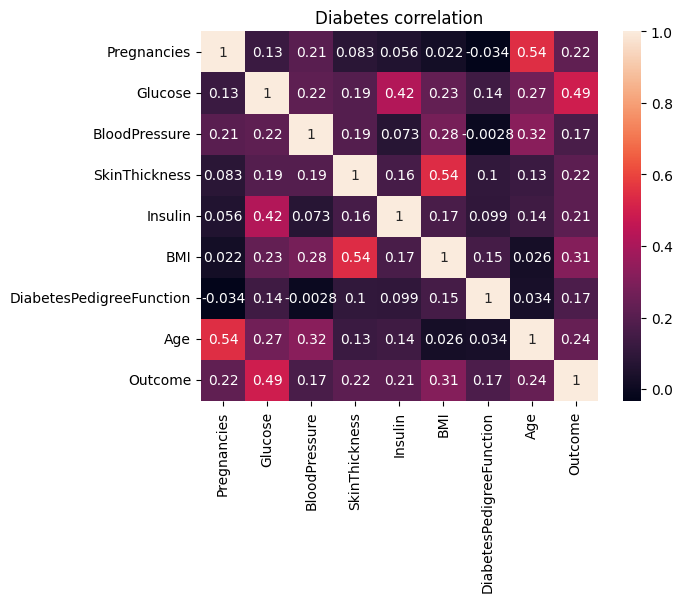

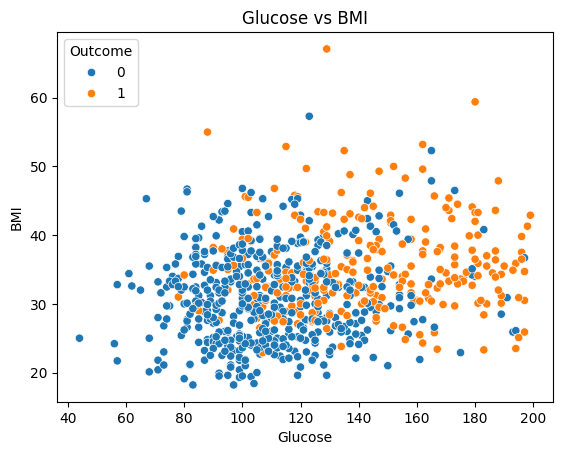

In [27]:
corr = diabetes_data.corr()

sns.heatmap(corr, annot=True)
plt.title("Diabetes correlation")
plt.show()

sns.scatterplot(data=diabetes_data, x='Glucose', y='BMI', hue='Outcome')
plt.title("Glucose vs BMI")
plt.show()

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.4 Fit logistic regression model, generate predictions

In [29]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

#### 2.5 Create a confusion matrix and evaluate created model with above functions

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[145,  20],
       [ 43,  46]])

#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

AUC: 0.8311201906707525


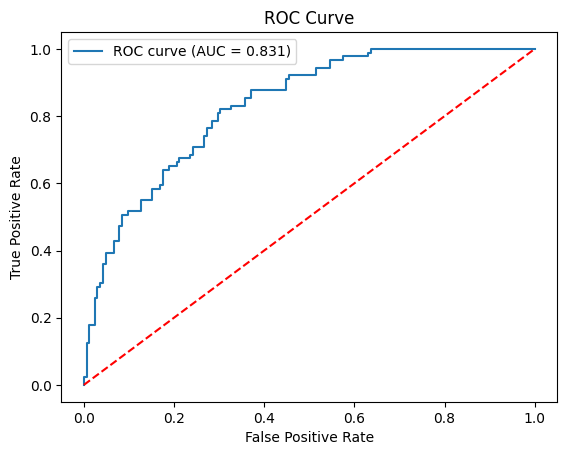

In [31]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

y_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)
print("AUC:", auc_score)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [32]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model,
    X_train_scaled,
    y_train,
    cv=kf,
    scoring='accuracy'
)

print("Mean accuracy:", cv_scores.mean())

Mean accuracy: 0.7645173453996984


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

In [33]:
dt_model = DecisionTreeClassifier(random_state=17)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

#### 3.2 Evaluate created model with above functions

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred_dt)
TN, FP, FN, TP = cm.ravel()

print("Accuracy: ", Accuracy(TP, TN, FP, FN))
print("Precision: ", Precision(TP, FP))
print("Recall: ", Recall(TP, FN))
print("F1-score: ", F1(Precision(TP, FP), Recall(TP, FN)))

Accuracy:  0.7755905511811023
Precision:  0.6666666666666666
Recall:  0.7191011235955056
F1-score:  0.6918918918918919


#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

AUC: 0.7625808648280558


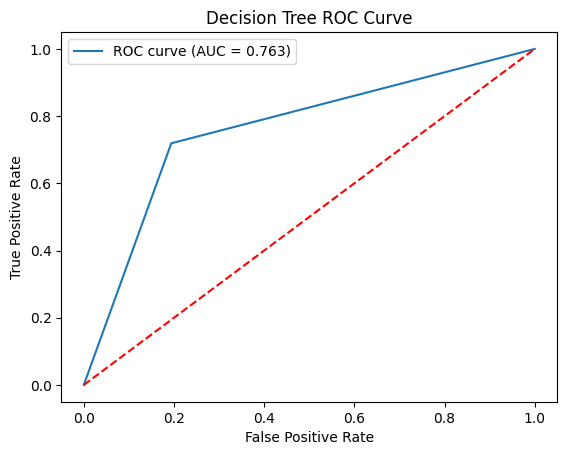

In [36]:
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba_dt)

auc_score = roc_auc_score(y_test, y_proba_dt)
print("AUC:", auc_score)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [37]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    dt_model,
    X_train_scaled,
    y_train,
    cv=kf,
    scoring='accuracy'
)

print("Mean accuracy:", cv_scores.mean())

Mean accuracy: 0.6943438914027149


#### 3.5 Make conclusions

In [38]:
# Logistic regression and decision tree both perform reasonably well on the diabetes dataset

In [39]:
# Logistic regression is more interpretable, decision tree can capture non linear patterns

In [40]:
# Glucose and BMI are the most important predictors having big correlations